[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9811659192825112
Classification Report:
               precision    recall  f1-score   support

    not spam       0.99      0.99      0.99       965
        spam       0.94      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



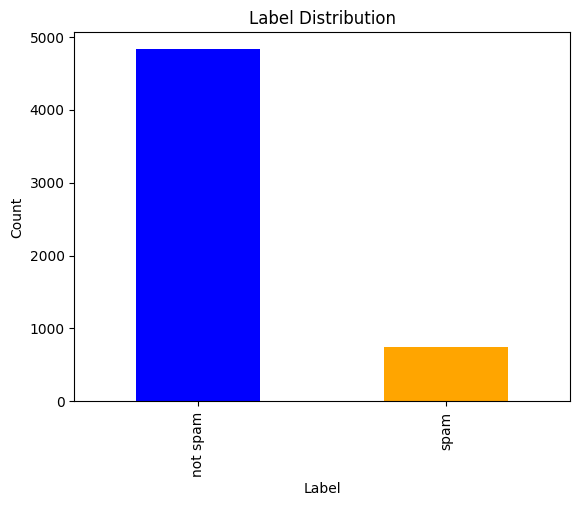

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
import re
import matplotlib.pyplot as plt

# Load and preprocess data
nltk.download('stopwords')
nltk.download('wordnet')
data = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
data.columns = ['label', 'message']
data['message'] = data['message'].apply(lambda x: ' '.join(
    word for word in re.sub(r'[^a-zA-Z]', ' ', str(x)).lower().split()
    if word not in set(nltk.corpus.stopwords.words('english'))))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'].apply(lambda x: 'spam' if x == 'spam' else 'not spam'), test_size=0.2, random_state=42)

# Vectorize, train, and predict
vectorizer = CountVectorizer()
X_train_vec, X_test_vec = vectorizer.fit_transform(X_train), vectorizer.transform(X_test)
model = MultinomialNB().fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Display results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
pd.Series(model.predict(vectorizer.transform(data['message']))).value_counts().plot(kind='bar', color=['blue', 'orange'], title='Label Distribution').set(xlabel='Label', ylabel='Count')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.9820627802690582
Classification Report:
               precision    recall  f1-score   support

    not spam       0.99      0.99      0.99       965
        spam       0.95      0.92      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



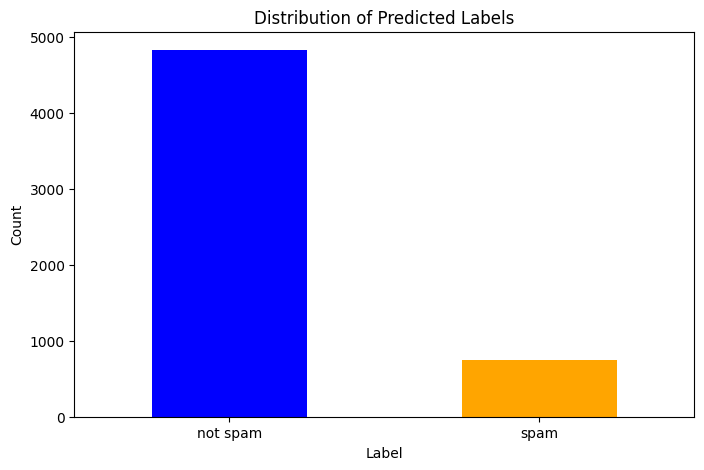

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Preprocessing the data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert input to string to handle non-string values
    text = str(text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['message'] = data['message'].apply(preprocess_text)

# Mark every data point as "spam" or "not spam"
data['predicted_label'] = data['label'].apply(lambda x: 'spam' if x == 'spam' else 'not spam')

# Splitting the dataset
X = data['message']
y = data['predicted_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vectorized)
data['final_predicted_label'] = model.predict(vectorizer.transform(data['message']))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the results
label_counts = data['final_predicted_label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
